Objective of Project: 
    1) Building a multiple Regression model to see which model is having high accuracy as the given data is continuous data.
    2) Have to predict the total sales generated from all the sales channel.

Importing required libraries for this project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Dropping the unwanted column "Unnamed: 0"

In [3]:
df = df.drop(columns = ['Unnamed: 0'], axis = 1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Here, we can look the data in breifly like quantile range,min,max,mean,Standard-deviation,Count of the data.

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Checking any missing values exist in data and there is no missing values

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

We will plot and see how the data has been distributed through out any plot.

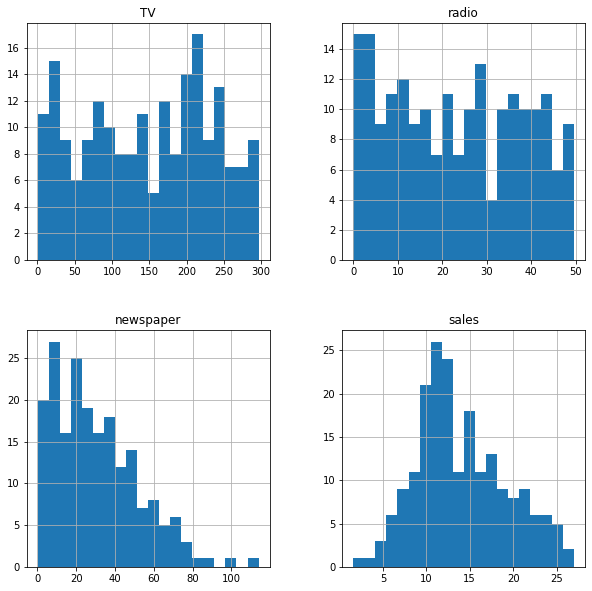

In [7]:
df.hist(bins = 20, figsize = (10,10))
plt.show()

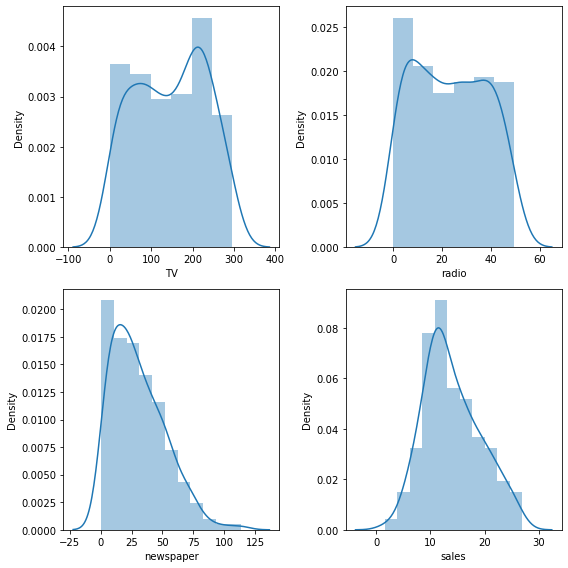

In [8]:
plt.figure(figsize = (8,8))
pltnumber = 1

for column in df:
    if pltnumber<=4:
        ax = plt.subplot(2,2,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

We are checking outliers and there is no outliers on our data.So proceeding with next steps for splitting the data.

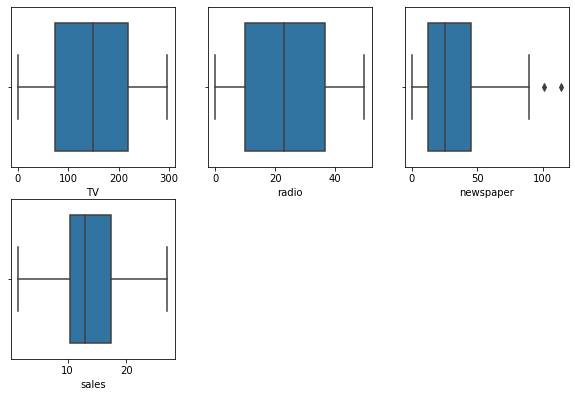

In [9]:
plt.figure(figsize=(10,10))
graph=1

for col in df:
    if graph<=4:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(df[col],orient ='v')
        plt.xlabel(col,fontsize=10)
    graph+=1
plt.show()

Next I want to see the correlation between variables through correlation table and for much understanding,I used Heat Map for easy visulaize and understanding and there is no correlation exist between features and we can see that feature TV has slightly correlated to target varibale sales.

In [36]:
corr = df.corr()  
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


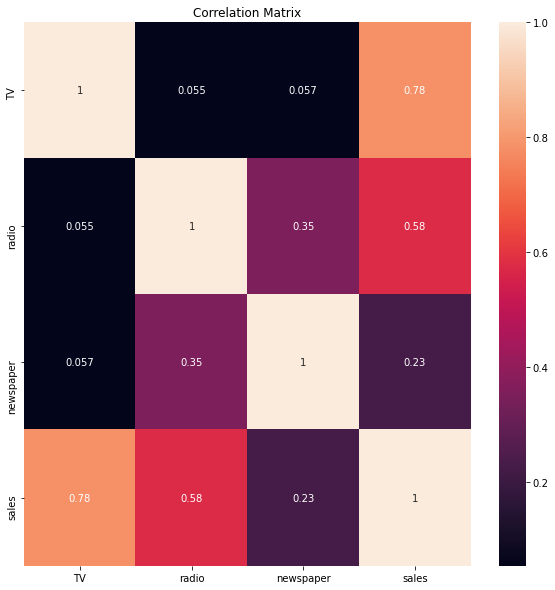

In [37]:
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix")
plt.show()

We can see that newspaper column is having skewness ,so we will try to remove that using transformation method

In [10]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [11]:
x = df.drop(columns = 'sales')
y = df['sales']

In [ ]:
Using power transform method,Trying to remove skewness

In [12]:
from sklearn.preprocessing import power_transform

df1 = power_transform(x)

df1= pd.DataFrame(df1,columns = x.columns)

In [13]:
df1.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

After removing skewness,merging the x and y columns and check outlier/skewness exist still,

In [15]:
dff = pd.concat([df1,y], axis = 1)

In [16]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


we can plot box plot and can see now that outliers/skewness has been removed.

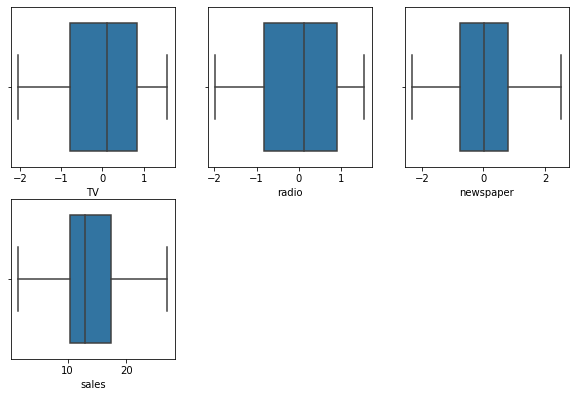

In [17]:
plt.figure(figsize=(10,10))
graph=1

for col in dff:
    if graph<=4:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(dff[col],orient ='v')
        plt.xlabel(col,fontsize=10)
    graph+=1
plt.show()

Splitting the data X and Y 

In [19]:
x = dff.drop(columns = 'sales')
y = dff['sales']

Before preparing the data for modelling,I am standardizing the data and it will convert the data into a standardize form in order to equalize the range of data

In [20]:
scalar = StandardScaler()
x_sc = scalar.fit_transform(x)

Splitting the train data and test data

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.25, random_state = 355)

Model Building - I am building models on these algorithm - 1) support vector Regressor 2) Decision tree Regressor  3) Liner Regression  4) Random forest Regressor to compare the accuracy.

Model 1 : Support Vector Regressor

In [22]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Train Data score:" , svm.score(x_train,y_train))
print("Test Data score:" ,  svm.score(x_test,y_test))

Train Data score: 0.9199561674364278
Test Data score: 0.9090925181000126


Model 2 : Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Train Data score:" , dt.score(x_train,y_train))
print("Test Data score:" ,  dt.score(x_test,y_test))

Train Data score: 1.0
Test Data score: 0.9457947038070631


Model 3 : Linear Regressor

In [24]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train,y_train)
y_pred = lin.predict(x_test)
print("Train Data score:" , lin.score(x_train,y_train))
print("Test Data score:" ,  lin.score(x_test,y_test))

Train Data score: 0.9050429278690124
Test Data score: 0.911935966808717


In [ ]:
Model 4 : Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
print("Train Data score:" , rfr.score(x_train,y_train))
print("Test Data score:" ,  rfr.score(x_test,y_test))

Train Data score: 0.9964606552059638
Test Data score: 0.9756174822657194


Applying CV Score for all models to check whether the model is overfitting or not.

In [26]:
from sklearn.model_selection import cross_val_score

scr_svm = cross_val_score(svm,x_sc,y,cv=5)
print("CV Score of SVM :", scr_svm.mean())

CV Score of SVM : 0.9171386899137435


In [27]:
scr_dt = cross_val_score(dt,x_sc,y,cv=5)
print("CV Score of DT :", scr_dt.mean())

CV Score of DT : 0.9550951672524313


In [28]:
scr_lin = cross_val_score(lin,x_sc,y,cv=5)
print("CV Score of LIN :", scr_lin.mean())

CV Score of LIN : 0.8978060430607069


In [29]:
scr_rfr = cross_val_score(rfr,x_sc,y,cv=5)
print("CV Score of RFR :", scr_rfr.mean())

CV Score of RFR : 0.976265782395671


Random Forest seems high in accuracy. Applying Grid search CV for tuning the hyper parameter to check whether the accuracy score is increasing or not


In [30]:
param = {'n_estimators' : [5,6,7,8,9,10,12,14] ,'max_depth': [4,8,12,16,20],'criterion' : ['mse'],
             'min_samples_leaf' : [2,4,6,8,10], 'min_samples_split' : [3,6,9,12,15] }

In [31]:
grid_search = GridSearchCV(rfr,param_grid = param, cv=5)

In [32]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [4, 8, 12, 16, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [3, 6, 9, 12, 15],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 12, 14]})

In [33]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 12}

In [34]:
final = RandomForestRegressor(n_estimators =12  ,max_depth = 12, criterion = 'mse',
                               min_samples_leaf =2 , min_samples_split = 3)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Train- Score:-" , final.score(x_train,y_train))
print("Test Score:-" , final.score(x_test,y_test))

Train- Score:- 0.9921723686536718
Test Score:- 0.9659372773889137


It didn't increase much after tuning but increased.

Saving the model.

In [35]:
import joblib
joblib.dump(final,"Sales-Prediction.pkl")

['Sales-Prediction.pkl']